In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data

In [3]:
Transaction = pd.read_csv('data/E-Commerce.csv', encoding = "ISO-8859-1")

# Examining Data

In [4]:
Transaction.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
Transaction.shape

(541909, 8)

In [6]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


# Setting Date from String Format to DataTime Format

In [7]:
Transaction['InvoiceDate'] = pd.to_datetime(Transaction['InvoiceDate'])

In [8]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
Transaction.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
Transaction['InoviceDate'] = Transaction['InvoiceDate'].sort_values()

In [15]:
Transaction.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InoviceDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00


In [16]:
Transaction = Transaction.set_index('InvoiceDate')

In [17]:
Transaction.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InoviceDate
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00


# Creating a New Column

In [18]:
Transaction['Sales'] = Transaction['Quantity'] * Transaction['UnitPrice']

In [19]:
Transaction.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InoviceDate,Sales
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34


## Boolean Indexing for Selection

In [20]:
Transaction = Transaction[(Transaction['Sales'] < 5000) & (Transaction['Sales'] > 0)]

In [21]:
Transaction.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InoviceDate,Sales
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34


# Resampling by Month to geth the Sum of Sales for Each Month

In [22]:
Sales_per_Month = Transaction['Sales'].resample('M').sum()

In [24]:
Sales_per_Month

InvoiceDate
2010-12-31     810204.810
2011-01-31     607641.560
2011-02-28     523631.890
2011-03-31     717639.360
2011-04-30     531269.221
2011-05-31     762393.270
2011-06-30     722769.900
2011-07-31     719221.191
2011-08-31     748076.320
2011-09-30    1051445.452
2011-10-31    1154979.300
2011-11-30    1509496.330
2011-12-31     470323.080
Freq: M, Name: Sales, dtype: float64

# Ploting

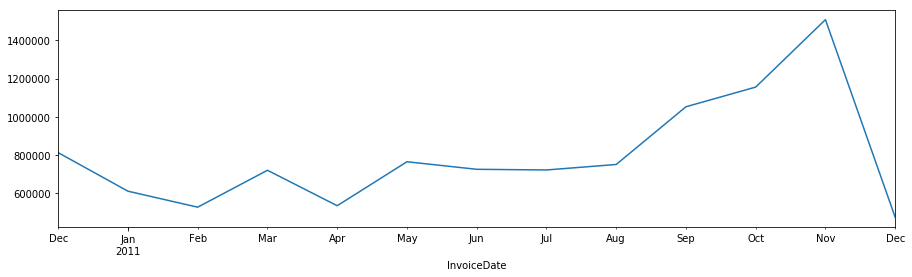

In [25]:
Sales_per_Month.plot(kind='line', figsize=(15, 4))

In [26]:
Sales_per_Month = Sales_per_Month['2010-12-31': '2011-11-30']

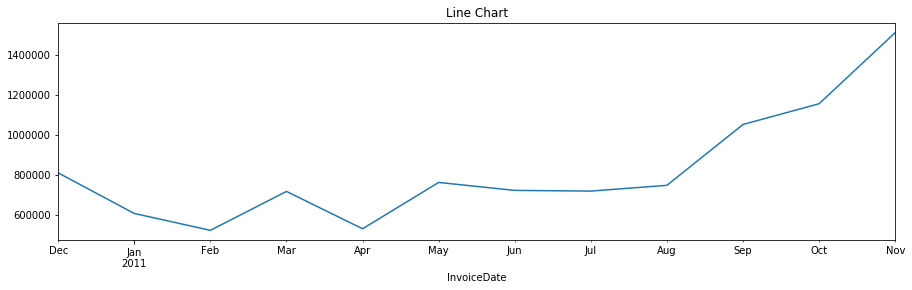

In [33]:
Sales_per_Month.plot(kind='line', figsize=(15, 4), title='Line Chart')

Text(0, 0.5, 'Total Sales by Month')

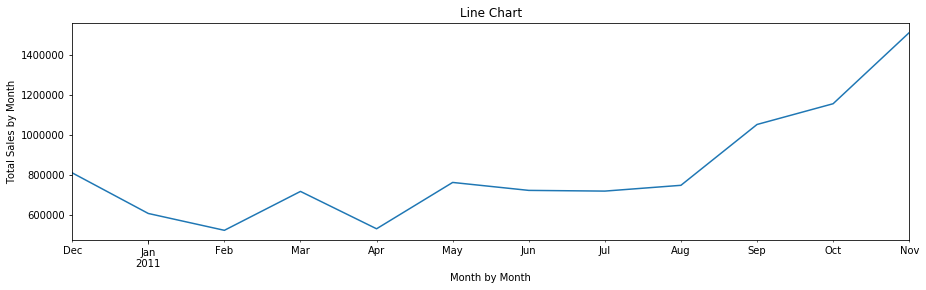

In [39]:
ax = Sales_per_Month.plot.line(figsize=(15, 4))

ax.set_title('Line Chart')
ax.set_xlabel('Month by Month')
ax.set_ylabel('Total Sales by Month')

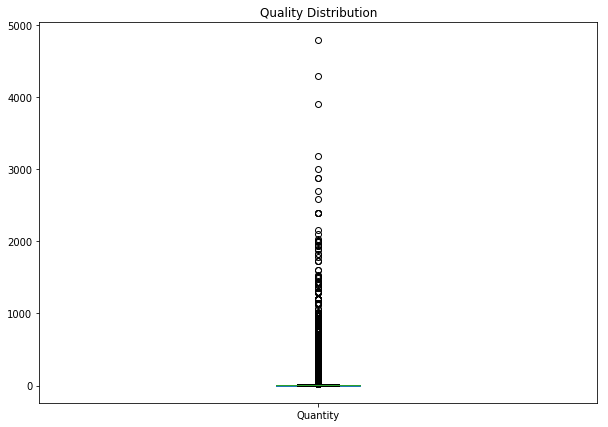

In [34]:
Transaction['Quantity'].plot(kind='box', figsize=(10, 7), title='Quality Distribution')

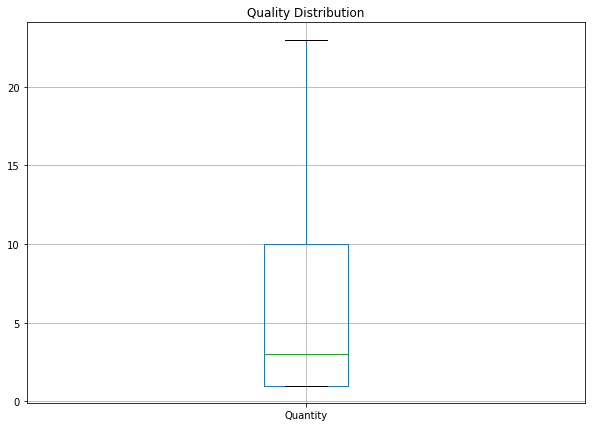

In [41]:
Transaction['Quantity'].plot(kind='box', figsize=(10, 7), title='Quality Distribution', showfliers=False, grid=True)

In [42]:
Transaction['Quantity'].value_counts()

1       147820
2        81699
12       61044
6        40839
4        38442
3        37037
24       24005
10       22266
8        13108
5        11717
48        6059
25        5119
20        5000
16        4260
36        3813
7         2901
9         2025
72        1943
96        1809
100       1807
18        1780
30        1173
40        1076
32        1045
144       1013
11         944
50         912
15         792
60         668
120        602
         ...  
175          1
688          1
177          1
179          1
1788         1
249          1
760          1
245          1
242          1
234          1
230          1
227          1
738          1
225          1
219          1
213          1
207          1
4300         1
205          1
199          1
197          1
708          1
196          1
4800         1
193          1
701          1
188          1
698          1
184          1
512          1
Name: Quantity, Length: 371, dtype: int64

In [50]:
TV = Transaction['Quantity'].value_counts()

In [65]:
TV300 = TV[TV.index < 300]

In [66]:
TV300

1      147820
2       81699
12      61044
6       40839
4       38442
3       37037
24      24005
10      22266
8       13108
5       11717
48       6059
25       5119
20       5000
16       4260
36       3813
7        2901
9        2025
72       1943
96       1809
100      1807
18       1780
30       1173
40       1076
32       1045
144      1013
11        944
50        912
15        792
60        668
120       602
        ...  
155         1
148         1
146         1
145         1
253         1
141         1
137         1
136         1
133         1
122         1
175         1
177         1
179         1
249         1
245         1
242         1
234         1
230         1
227         1
225         1
219         1
213         1
207         1
205         1
199         1
197         1
196         1
193         1
188         1
184         1
Name: Quantity, Length: 223, dtype: int64

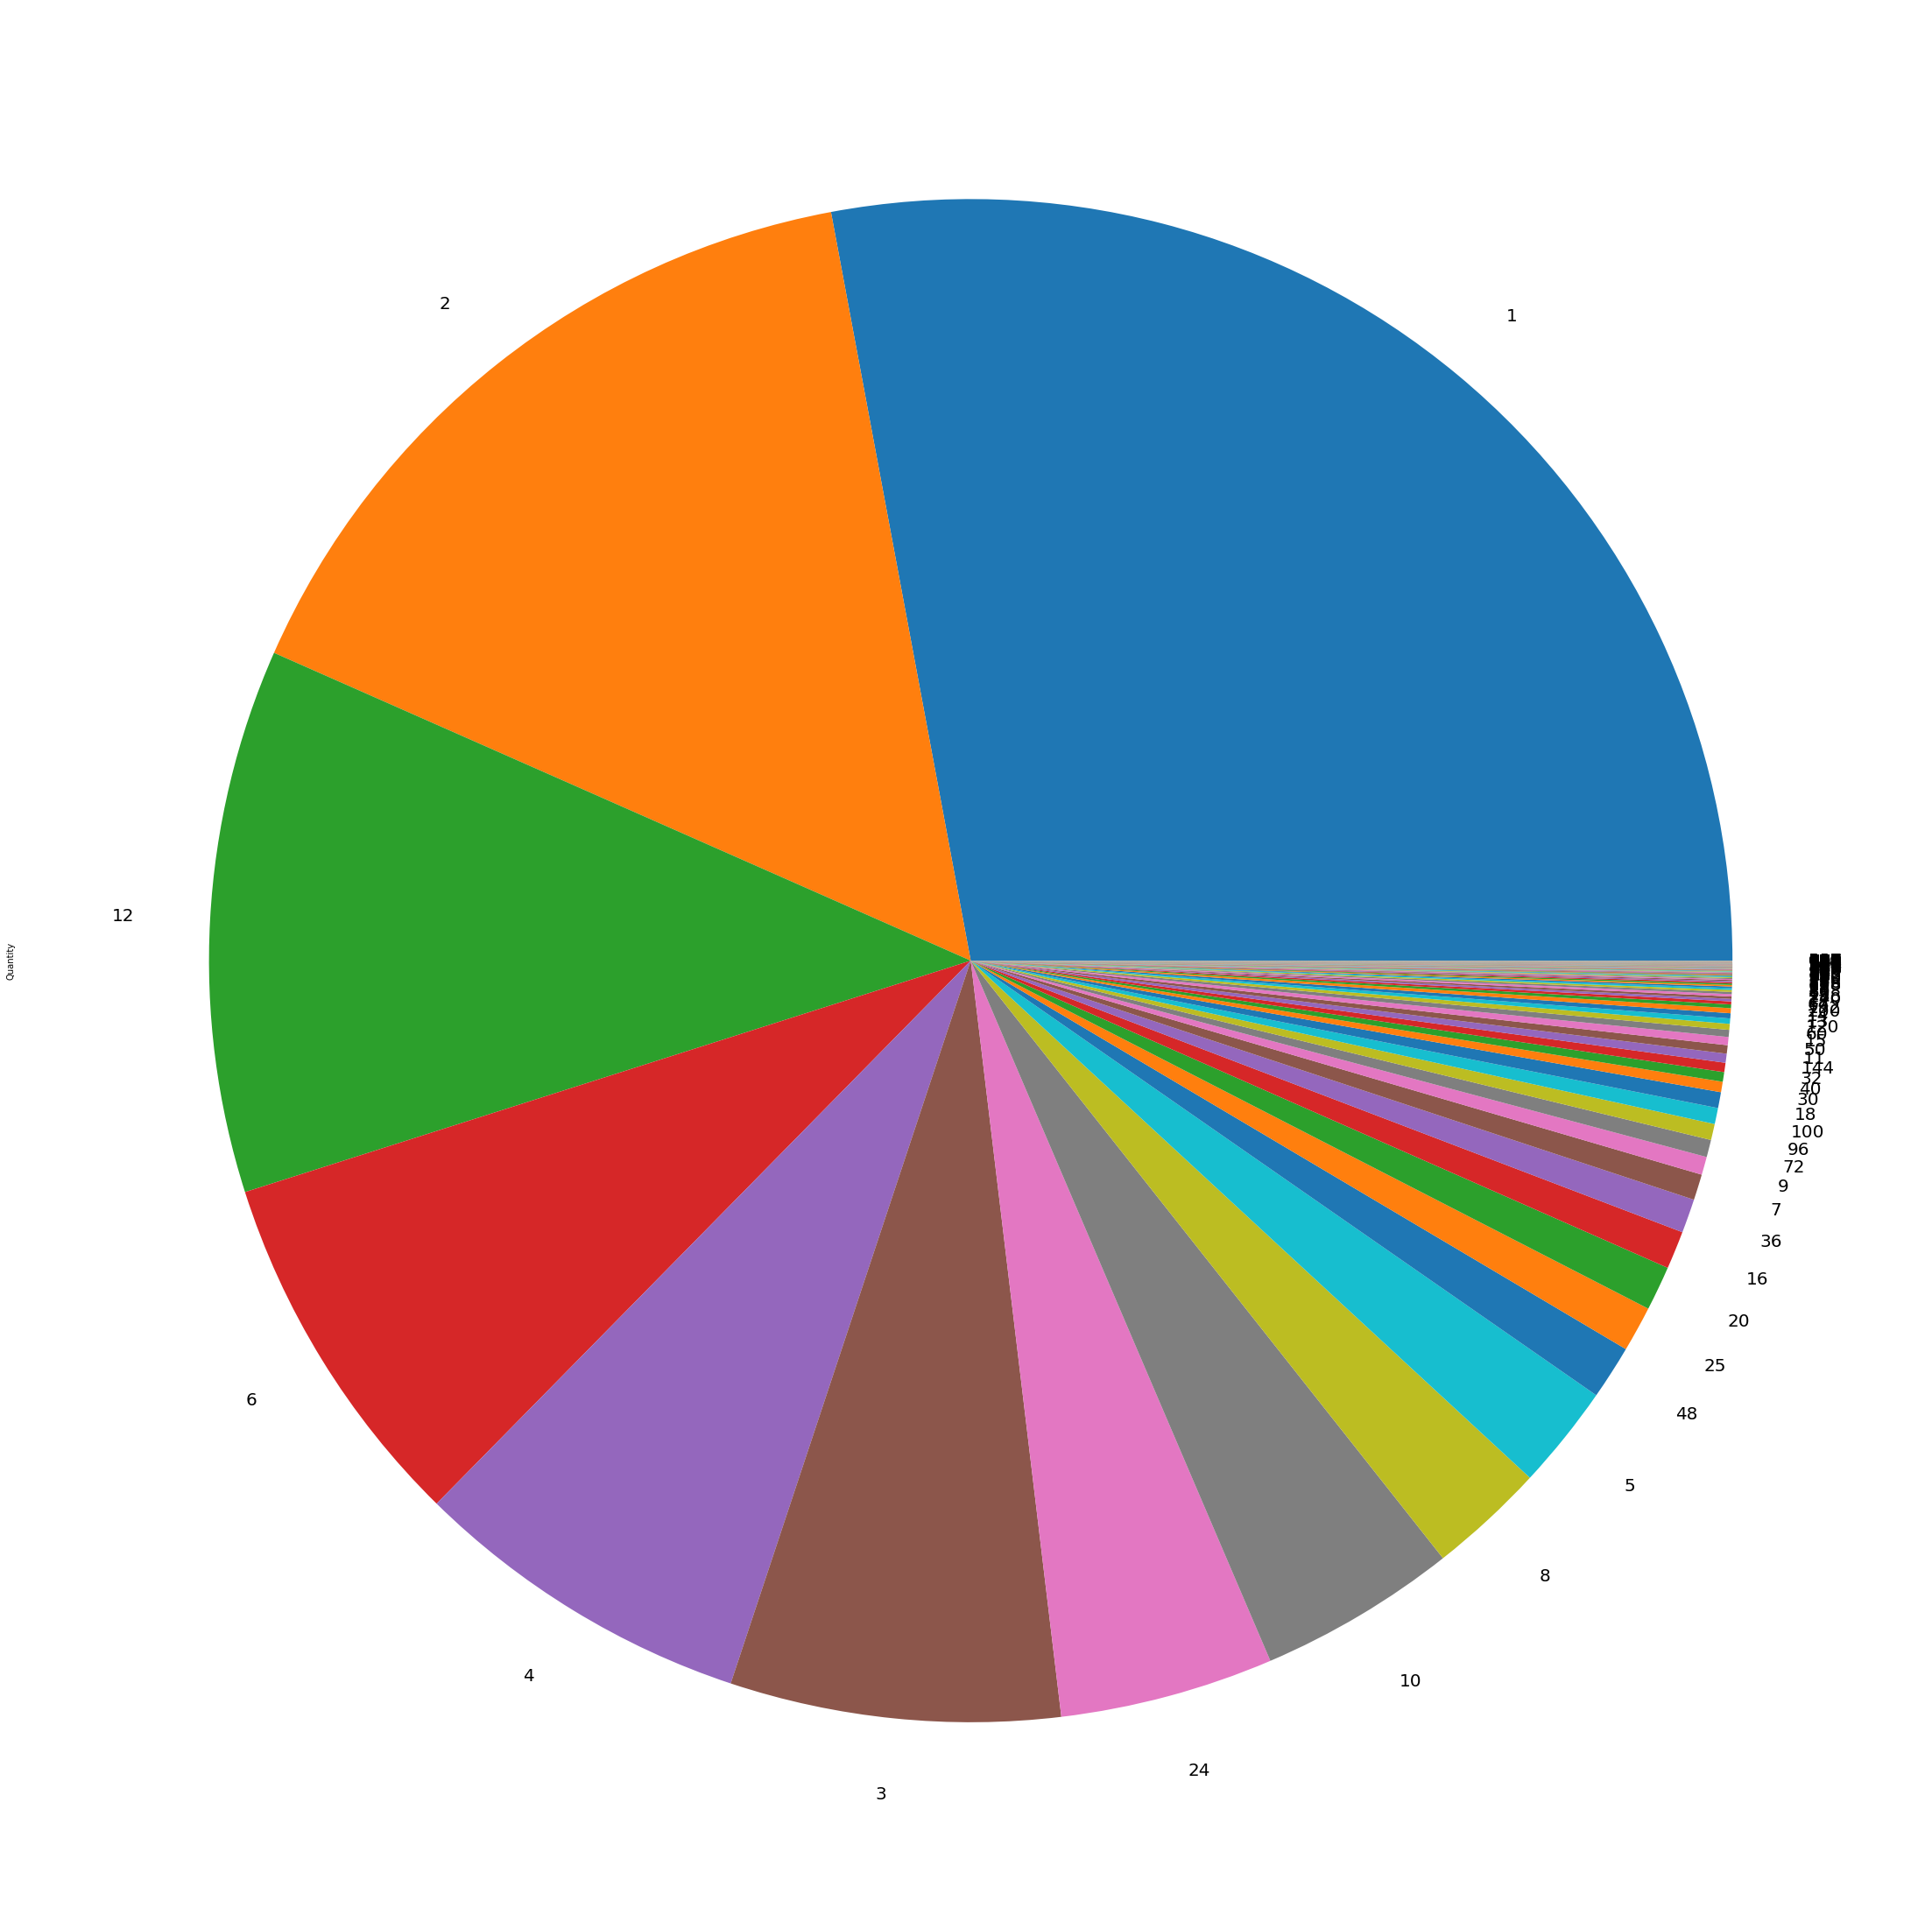

In [67]:
TV300.plot(kind='pie', figsize=(40, 40), fontsize=20)

In [68]:
T50 = TV[TV.index < 50]

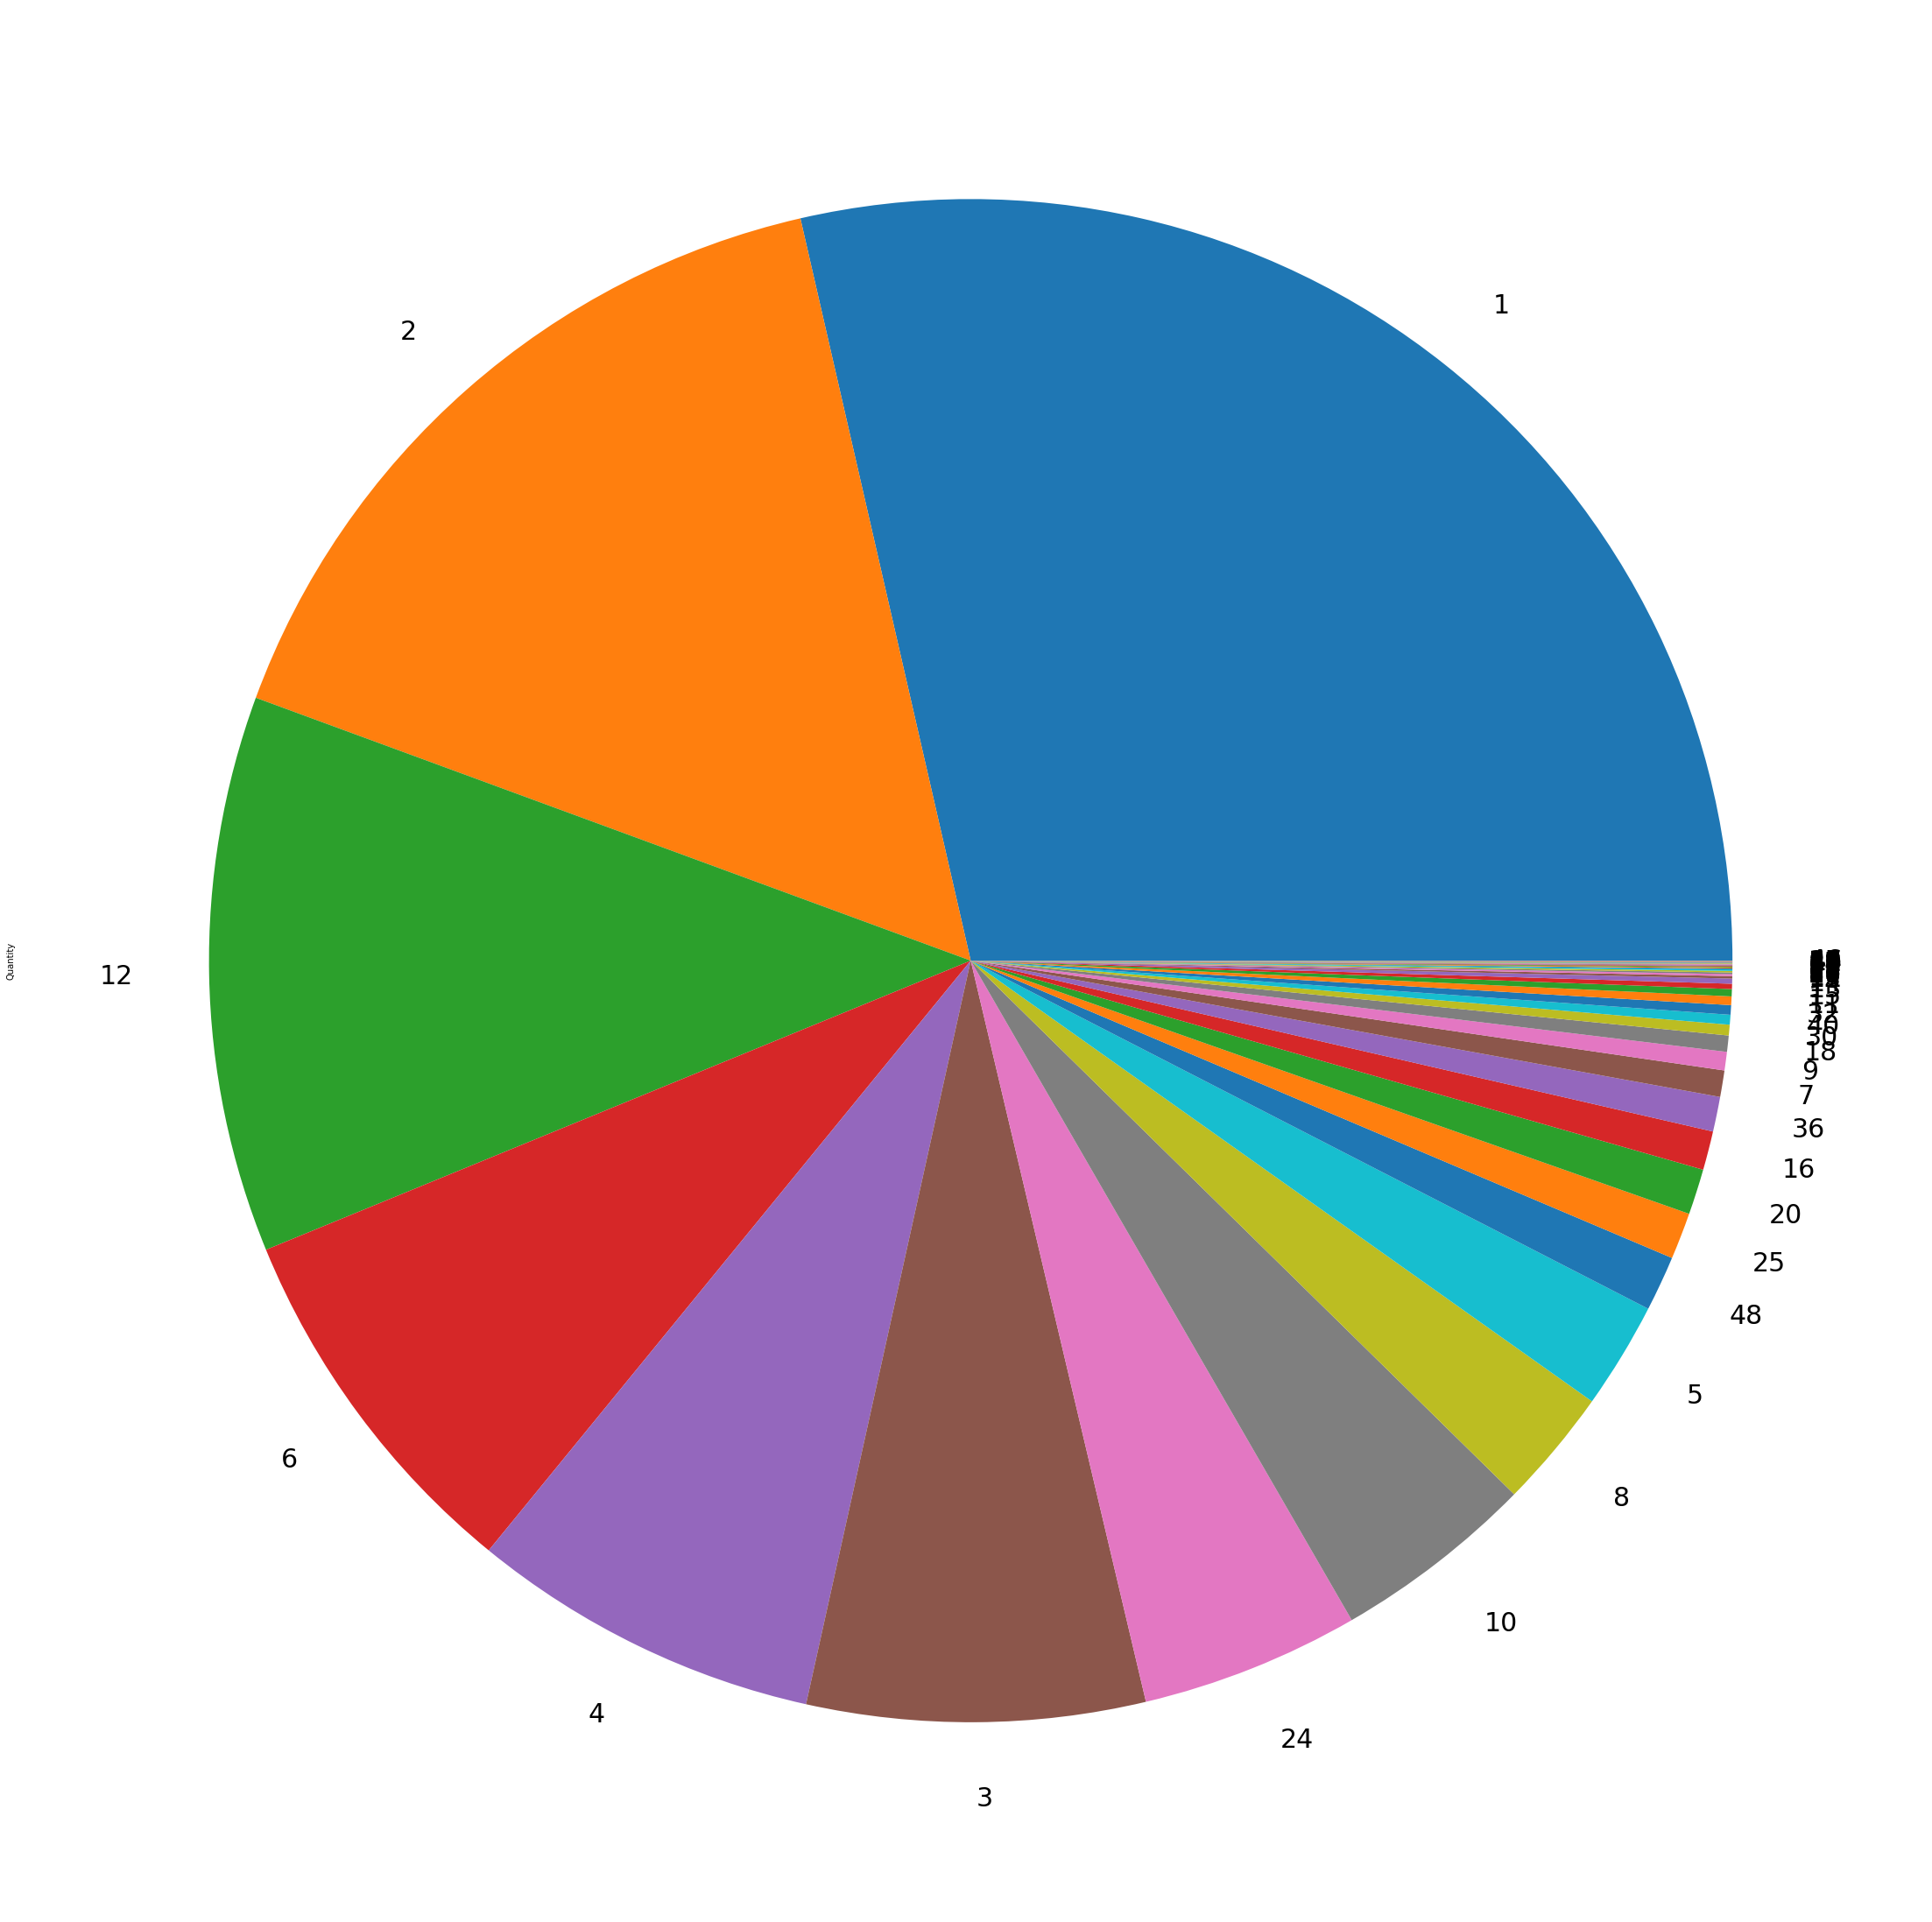

In [69]:
T50.plot(kind='pie', figsize=(40, 40), fontsize=30)

In [60]:
T25 = Transaction[Transaction['Quantity'] < 25]

In [63]:
T25.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InoviceDate,Sales
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34


In [62]:
T25V = T25['Quantity'].value_counts()

In [64]:
T25V.head()

1     147820
2      81699
12     61044
6      40839
4      38442
Name: Quantity, dtype: int64

In [72]:
T25VL = T25V[T25V.index < 25]

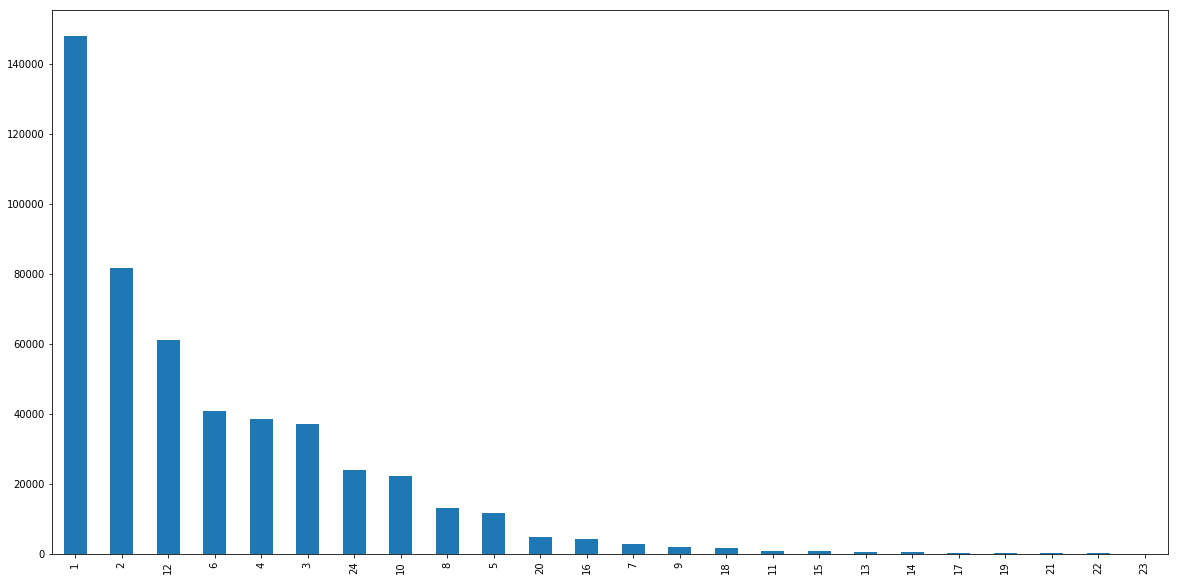

In [73]:
T25VL.plot(kind='bar', figsize=(20, 10))

In [74]:
Transaction.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,InoviceDate,Sales
InvoiceDate,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34


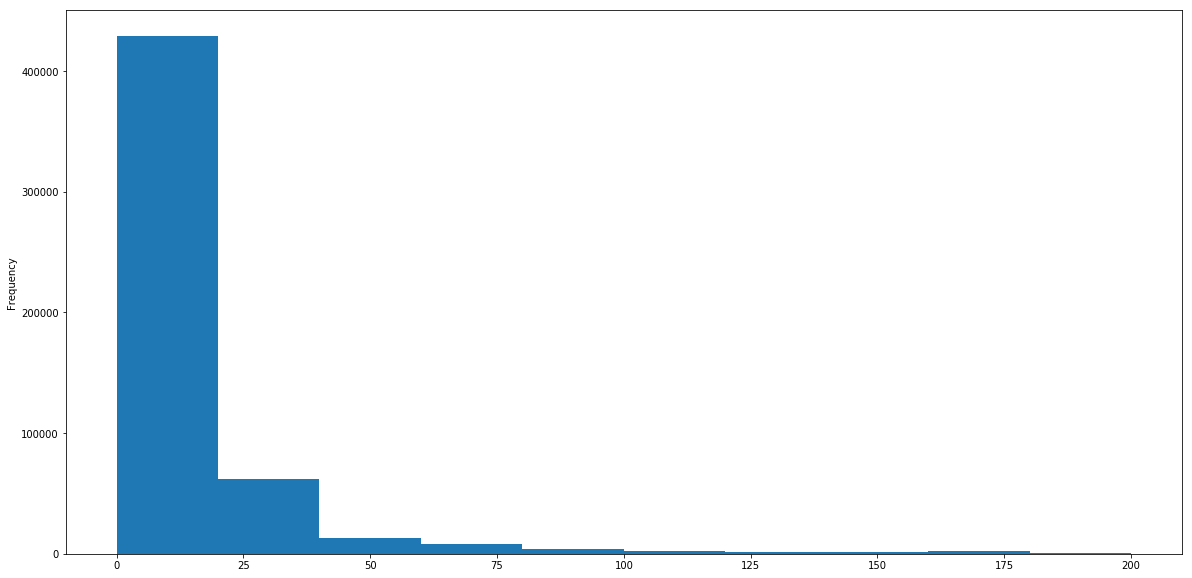

In [77]:
Transaction['Sales'].plot(kind='hist', bins=[0,20, 40, 60, 80, 100, 120, 140, 160, 180, 200], figsize=(20, 10))